# Walk the Line
------

In [1]:
import numpy as np                  # fast math library
import matplotlib.pyplot as plt     # matplotlib is for plotting stuff
import seaborn as sns               # seaborn is for nicer looking plots
sns.set()                           # activate seaborn
from plot_function import *         # custom library for plotting functions and gradients

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---
## Topic 1 - 1D Gradient Descent

### Task 1.1 - Simple 1D Function Example

In [2]:
def f_1d(x:float) -> float:
    ''' Simple 1D polynomial function of thrid oder '''
    return 0.005 * x**4 - 0.1 * x**2 - 0.2 * x
# ---

In [3]:
def df_1d(x:float) -> float:
    ''' Derivative of the simple 1D polynomial function above'''
    return 0.02 * x**3 - 0.2 * x - 0.2
# ---

----
### Task 1.2 - Perform 1D Gradient Descent Step

In [4]:
def follow_df_1d(curr_x:float, df_1d:object, step:float) -> float:
    '''
    Returns a new position of x that followed the opposite
    direction of the gradient
    
    :param curr_x:   current value of x
    :param df_1d:    derivative of 1D function   [this parameter points to a function]
    :param step:     step size along the gradient
    '''
    return curr_x - step * df_1d(curr_x)
# ---

#### Show Case 1.1: Everything is fine

You should see that the red dot reaches the closest local minimum.

In [18]:
'''<Execute this code cell to reset the current position of x>'''
curr_x  = 0.5

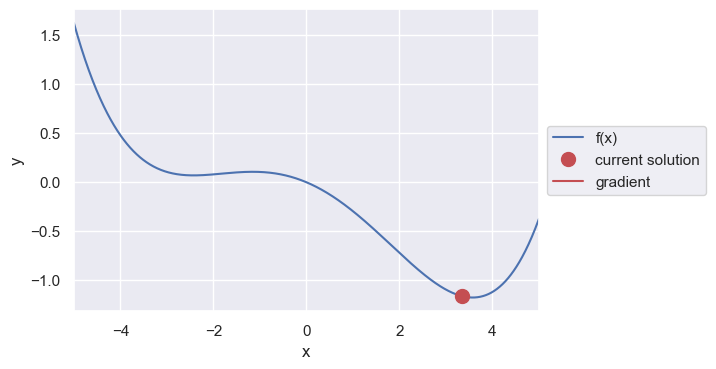

In [27]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards a local minimum>'''

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5])

# move x in the opposite direction of the gradient to find the closest local minimum
curr_x = follow_df_1d(curr_x=curr_x, df_1d=df_1d, step=1.)

#### Show Case 1.2 - The problem of jumping over the local minimum

You should see that the red dot jumps over the closest local minimum. This happens because the step size is too big.

In [28]:
'''<Execute this code cell to reset the current position of x>'''
curr_x  = 0  

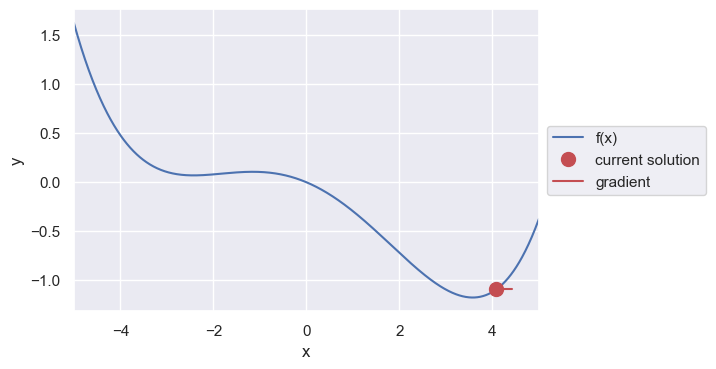

In [48]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards a local minimum>'''

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5])

# move x in the opposite direction of the gradient to find the closest local minimum
curr_x = follow_df_1d(curr_x=curr_x, df_1d=df_1d, step=4)

#### Show Case 1.3 - The problem of small gradients

You should see that at the beginning, it takes very long for the red dot to start moving. <br>
This happens because at the initial location of the dot, the gradient is very small.

In [49]:
'''<Execute this code cell to reset the current position of x>'''
curr_x  = -1.153

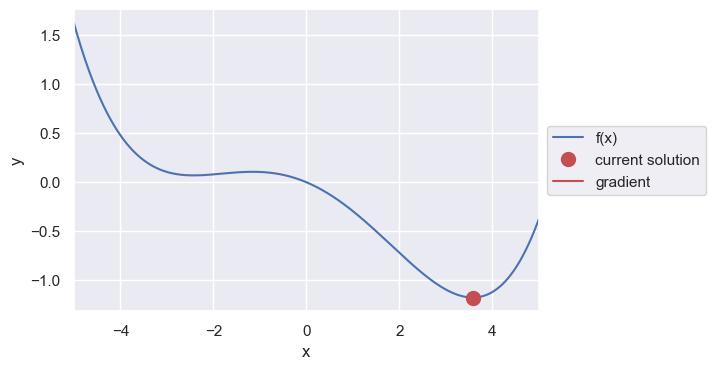

In [91]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards a local minimum>'''

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5])

# move x in the opposite direction of the gradient to find the closest local minimum
curr_x = follow_df_1d(curr_x=curr_x, df_1d=df_1d, step=2)

#### Show Case 1.4 - The problem of getting stuck in a local minimum

You should see that the red dot does not end up at the global minimum, but at the closest local minimum instead.

In [92]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = -4.5

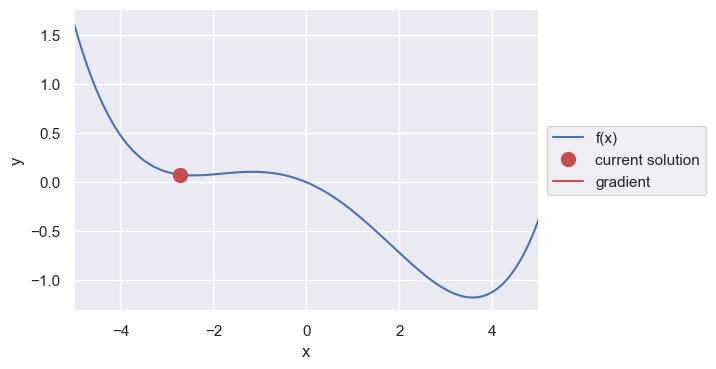

In [119]:
'''<Execute this code cell repeatedly to move x towards a local minimum>'''

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5])

# move x in the opposite direction of the gradient
curr_x = follow_df_1d(curr_x=curr_x, df_1d=df_1d, step=0.25)

----
## Topic 2 - 2D Gradient Descent
### Task 2.1 - Simple 2D Function Example

In [120]:
def f_2d(x1:float, x2:float) -> float:
    '''
    Simple 2D trigonometric function
    
    :param x1: first input parameter
    :param x2: second input parameter
    :return:   scalar output of the function
    '''
    return np.cos(x1) + np.cos(x1 + x2)
# ---

def df_2d(x1:float, x2:float) -> np.ndarray:
    '''
    Gradient of the simple 2D trigonometric function above
    
    :param x1: first input parameter
    :param x2: second input parameter
    :return:   2D gradient vector containing the partial derivatives    
    '''
    df_2d_1 = -np.sin(x1) - np.sin(x1 + x2)
    df_2d_2 = -np.sin(x1 + x2)
    return np.array([df_2d_1, df_2d_2])
# ---

----
### Task 2.2 - Perform 2D Gradient Descent Step

In [121]:
def follow_df_2d(x1:float, x2:float, df_2d:object, step:float) -> np.ndarray:
    '''
    Returns a new position of the 2D vector [x1, x2] that followed the opposite
    direction of the 2D gradient df_2d for a certain step size
    
    :param x1:       first input parameter
    :param x2:       second input parameter
    :param df_2d:    gradient of a 2D function  [this parameter points to a function]
    :param step:     step size along the gradient
    :return:         2D position vecor after taking the step
    '''
    return np.array([x1, x2]) - step * df_2d(curr_x[0], curr_x[1])
# ---

#### Show Case 2.1 - 2D Gradient Descent

You should see that the blue dot moves towards the closest local minimum.

In [122]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = np.array([0, -1])

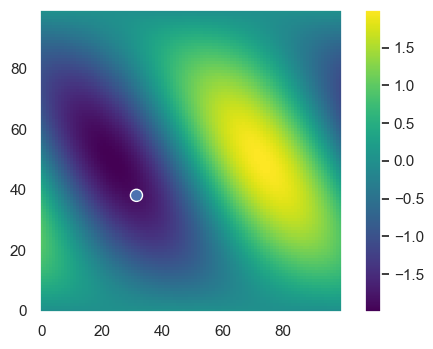

In [140]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards a local minimum>'''
plot_2D_function(f=f_2d, curr_x=curr_x, df_dx=df_2d, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3)

# move x in the opposite direction of the gradient
curr_x = follow_df_2d(x1=curr_x[0], x2=curr_x[1], df_2d=df_2d, step=0.25)

----
## Task 3 - Inverse 1D Gradient
### Task 3.1 - Follow the Inverse 1D Gradient

In [141]:
def follow_inv_df_1d(df_1d:object, curr_x:float, e:float, step:float) -> float:
    '''
    Returns a new position of x that followed the direction of the inverse of the 1D gradient df.
    
    :param df_1d:    derivative of a 1D function [this parameter points to a function]
    :param curr_x:   current value of x
    :param e:        error in y direction
    :param step:     step size along the inverse gradient
    '''
    return curr_x + step * e / df_1d(curr_x)
# ---

#### Show Case 3.1 - Everything is fine

You should see that the red dot converges towards the yellow line.

In [152]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = 0

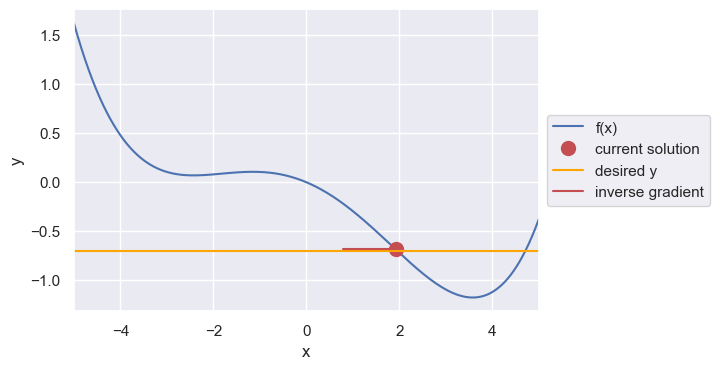

In [166]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards location where f(x) is desired y >'''

# specify desired y value
y_des = -0.7

# compute the error, i.e., the difference between the desired and actual output of the function
e  = y_des - f_1d(curr_x)

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5], yd=y_des, gradient_plotting_factor=0.5)

# move x so f(x) = desired y by following the inverse gradient
curr_x = follow_inv_df_1d(df_1d=df_1d, curr_x=curr_x, e=e, step=0.25)

#### Show Case 3.2 - The problem of high velocities close to singularities

You should see that close to a local minimum (where the derivative of the function is close to zero) the inverse of the gradient is very high. <br>
Therefore, the red dot will jump.

In [167]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = -4.

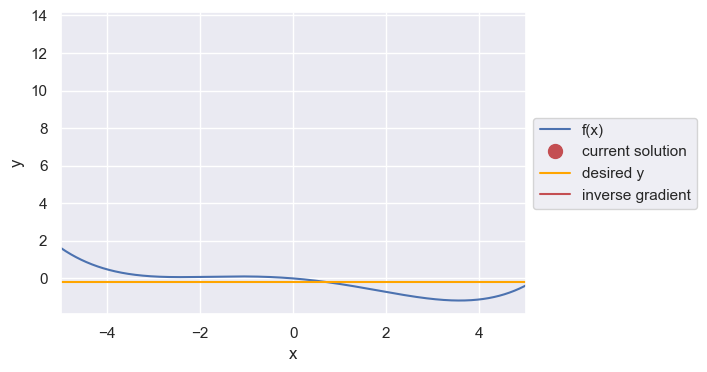

In [173]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards location where f(x) is desired y >'''

# specify desired y value
y_des = -0.2

# compute the error, i.e., the difference between the desired and actual output of the function
e  = y_des - f_1d(curr_x)

# plot function, current position, and gradient
plot_1D_function(f_1d, df_dx=df_1d, curr_x=curr_x, xlim=[-5, 5], yd=y_des)

# move x so f(x) = desired y by following the inverse gradient
curr_x = follow_inv_df_1d(df_1d=df_1d, curr_x=curr_x, e=e, step=0.3)

----
## Task 4 - Inverse 2D Gradient
### Task 4.1 - Follow the Inverse 2D Gradient

In [174]:
def follow_inv_df_2d(df_2d:object, x1:float, x2:float, e:float, step:float) -> np.ndarray:
    '''
    Returns a new position of x that followed the direction of the inverse of the gradient
    
    :param df_2d:    derivative of a 2D function [this parameter points to a function]
    :param x1:       first input parameter
    :param x2:       second input parameter
    :param e:        error: the difference between desired and actual output of the 2D function
    '''
    return np.array([x1, x2]) + step * e / df_2d(x1, x2)
# ---

In [175]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = np.array([-2, -0.5])

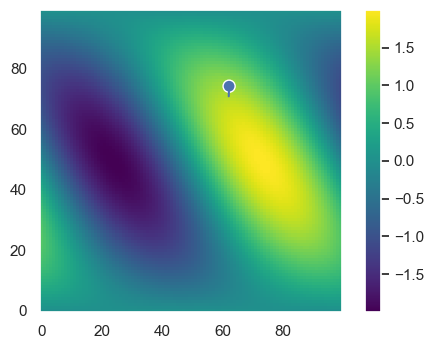

desired z: 1.5 current z: 1.43


In [205]:
'''<Execute this code cell repeatedly [ctrl + enter] to move x towards location where f(x1, x1) is desired y >'''
plot_2D_function(f=f_2d, curr_x=curr_x, df_dx=df_2d, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3)

# specify the desired output of the 2D function
z_des = 1.5

# compute the error, i.e., the difference between the desired and actual output of the 2D function
e     = z_des - f_2d(curr_x[0], curr_x[1])

# take a step that minimizes the error
curr_x = follow_inv_df_2d(df_2d=df_2d, x1=curr_x[0], x2=curr_x[1], e=e, step=0.1)

print('desired z:', z_des, 'current z:', np.round(f_2d(curr_x[0], curr_x[1]), 2))

----
## Topic 5 - Jacobian Matrix
### Task 5.1 - A Second Simple 2D Function

In [206]:
def g_2d(x1:float, x2:float) -> float:
    '''
    Simple 2D trigonometric function
    
    :param x1: first input parameter
    :param x2: second input parameter
    :return:   scalar output of the function
    '''
    return np.sin(x1) + np.sin(x1 + x2)
# ---

def dg_2d(x1:float, x2:float) -> float:
    '''
    Gradient of the simple 2D trigonometric function above
    
    :param x1: first input parameter
    :param x2: second input parameter
    :return:   2D gradient vector containing the partial derivatives    
    '''    
        
    dz2_x = np.cos(x1) + np.cos(x1 + x2)
    dz2_y = np.cos(x1 + x2)
    return np.array([dz2_x, dz2_y])
# ---

#### Show Case 5.1 - Now there are two functions that depend on the parameters a and b

You should see two 2D functions and the current position x (the blue dot) located at the same position. <br>
The two functions provide different outputs for the identical position x.

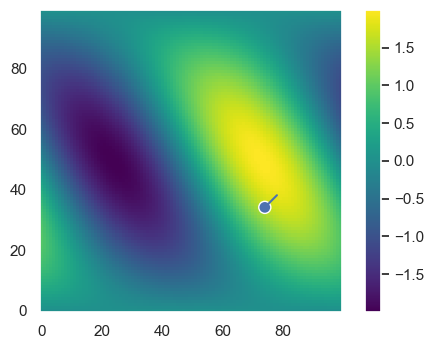

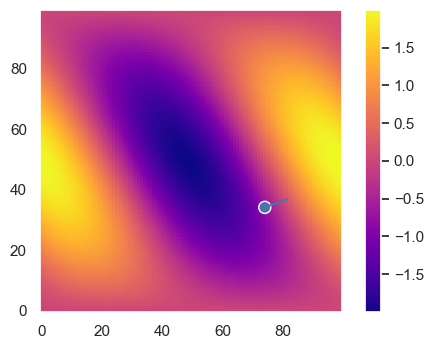

In [207]:
curr_x = np.array([0, -1])
plot_2D_function(f=f_2d, curr_x=curr_x, df_dx=df_2d, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3)
plot_2D_function(f=g_2d, curr_x=curr_x, df_dx=dg_2d, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3, cmap='plasma')

----
### Task 5.2 - Compute Jacobian

In [208]:
def get_jacobian(x1:float, x2:float, df1_2d:object, df2_2d:object) -> np.ndarray:
    '''
    Returns Jacobian matrix.
    
    :param x1:      first positional input parameter
    :param x2:      second positional input parameter
    :param df1_2d:  gradient of first 2D function [this parameter points to a function]
    :param df2_2d:  gradient of second 2D function [this parameter points to a function]
    '''
    return np.array([[df1_2d(x1, x2)[0], df2_2d(x1, x2)[0]],
                     [df1_2d(x1, x2)[1], df2_2d(x1, x2)[1]]])
# ---

#### Show Case 5.2 - Use Jacobian to reach desired z values

In [209]:
'''<Execute this code cell to reset the current position of x>'''
curr_x = np.array([-1, -2.5])

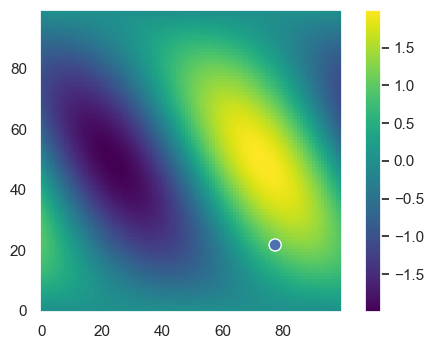

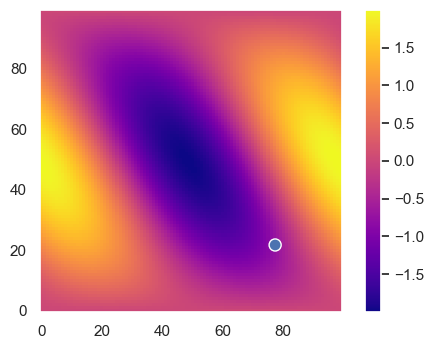

desired z: [ 1.  -0.8] current z: [ 0.98014416 -0.78662972]


In [225]:

plot_2D_function(f=f_2d, curr_x=curr_x, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3)
plot_2D_function(f=g_2d, curr_x=curr_x, xlim=[-np.pi-1.5, np.pi-1.5], gradient_plotting_factor=0.3, cmap='plasma')

# define desired state z = [f(x1, x2), g(x1, x2)]
z_desired = np.array([1, -0.8]) # <- you can play around with these values

# compute the actual current 2D state z = [f(x1, x2), g(x1, x2)]
curr_z    = np.array([f_2d(curr_x[0], curr_x[1]), g_2d(curr_x[0], curr_x[1])]) 

# compute the error between desired and actual state
e         = z_desired - curr_z

# compute the jacobian matrix
J         = get_jacobian(curr_x[0], curr_x[1], df_2d, dg_2d)

step      = 0.2

# compute the step towards the desired z
curr_x    = curr_x + step * np.linalg.pinv(J) @ e

print('desired z:', z_desired, 'current z:', curr_z)